In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customer=pd.read_csv(r"C:\Users\drish\Downloads\Customers.csv")
df_products=pd.read_csv(r"C:\Users\drish\Downloads\Products.csv")
df_transactions=pd.read_csv(r"C:\Users\drish\Downloads\Transactions.csv")

In [3]:
transaction_data = df_transactions.groupby('CustomerID').agg({
    'ProductID': 'count',         # Purchase frequency
    'Price': ['mean', 'sum'],     # Avg and total spend
}).reset_index()
transaction_data.columns = ['CustomerID', 'PurchaseFrequency', 'AvgSpend', 'TotalSpend']
customer_data = df_customer.merge(transaction_data, on='CustomerID', how='left')

In [4]:
customer_data.fillna(0, inplace=True)

In [5]:
encoder = LabelEncoder()
if 'Region' in customer_data.columns:  
    customer_data['Region'] = encoder.fit_transform(customer_data['Region'])
scaler = StandardScaler()
numerical_cols = ['PurchaseFrequency', 'AvgSpend', 'TotalSpend']
customer_data[numerical_cols] = scaler.fit_transform(customer_data[numerical_cols])

In [6]:
dbi_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_data[numerical_cols])
    db_index = davies_bouldin_score(customer_data[numerical_cols], labels)
    dbi_scores.append((k, db_index))

C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [7]:
optimal_clusters = min(dbi_scores, key=lambda x: x[1])[0]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[numerical_cols])

C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
silhouette_avg = silhouette_score(customer_data[numerical_cols], customer_data['Cluster'])
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"DB Index for Optimal Clusters: {min(dbi_scores, key=lambda x: x[1])[1]}")
print(f"Silhouette Score: {silhouette_avg}")

Optimal Number of Clusters: 14
DB Index for Optimal Clusters: 0.7761090233969
Silhouette Score: 0.3796821124583702


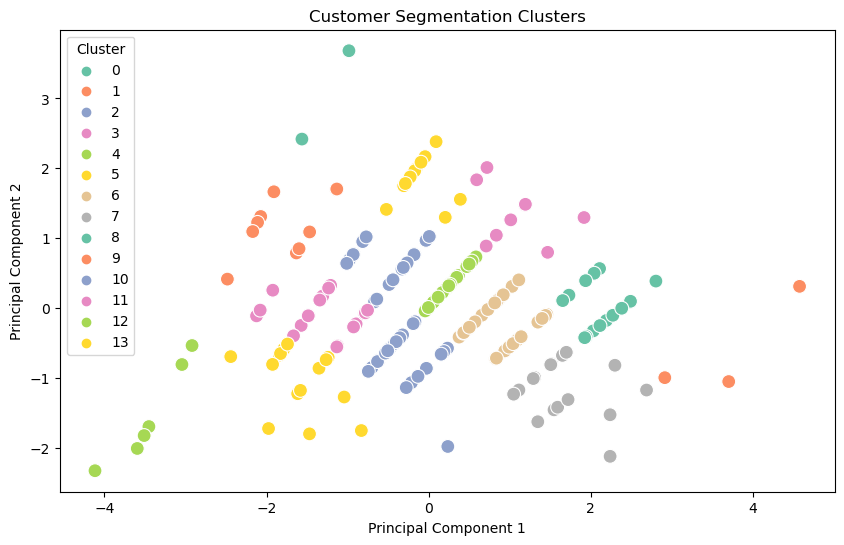

In [9]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_data[numerical_cols])
visual_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
visual_data['Cluster'] = customer_data['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visual_data, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


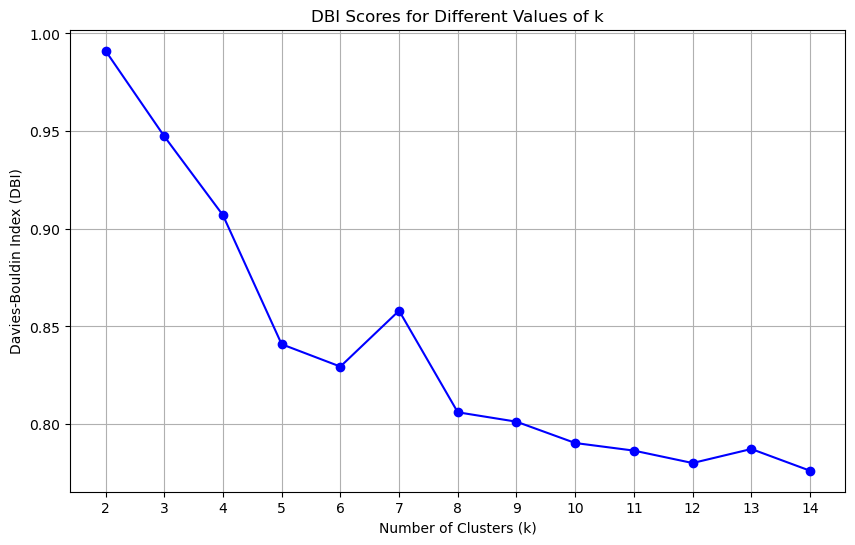

The optimal number of clusters is 14 with a DBI score of 0.78


In [10]:
# Step 5: Plot DBI scores for different values of k
k_values = [score[0] for score in dbi_scores]
dbi_values = [score[1] for score in dbi_scores]

plt.figure(figsize=(10, 6))
plt.plot(k_values, dbi_values, marker='o', linestyle='-', color='b')
plt.title('DBI Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index (DBI)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Indicate the optimal number of clusters
print(f"The optimal number of clusters is {optimal_clusters} with a DBI score of {min(dbi_values):.2f}")


In [11]:
dbi_scores=[]
final_model = KMeans(n_clusters=8, random_state=42)
labels = final_model.fit_predict(customer_data[numerical_cols])
db_index = davies_bouldin_score(customer_data[numerical_cols], labels)
dbi_scores.append((8, db_index))

C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
optimal_clusters = min(dbi_scores, key=lambda x: x[1])[0]
final_model = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = final_model.fit_predict(customer_data[numerical_cols])

C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\drish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
silhouette_avg = silhouette_score(customer_data[numerical_cols], customer_data['Cluster'])
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"DB Index for Optimal Clusters: {min(dbi_scores, key=lambda x: x[1])[1]}")
print(f"Silhouette Score: {silhouette_avg}")

Optimal Number of Clusters: 8
DB Index for Optimal Clusters: 0.8060334364356532
Silhouette Score: 0.3722102687998965
